In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [5]:
# Change here for different observation gap and observation covariance parameter
mu=0.4
dt=0.01

spr=5
t_start=0
t_stop=5000

model_dim=3
model_name='L63'
base_type='Forecast'
num_clv=3
coord=['X','Y','Z']


start_idx=20000+10000
os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L63_clvs/noisy_state/mu={}'.format(mu))
base_traj=np.load('../State_g={}.npy'.format(dt))[start_idx+t_start:start_idx+t_stop]
base_type='state_noisy'

C=np.load('matrices_c_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]
G=np.load('matrices_g_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]

In [8]:
V=np.zeros_like(G)
for i in range(G.shape[0]):
    V[i]=G[i]@C[i] 

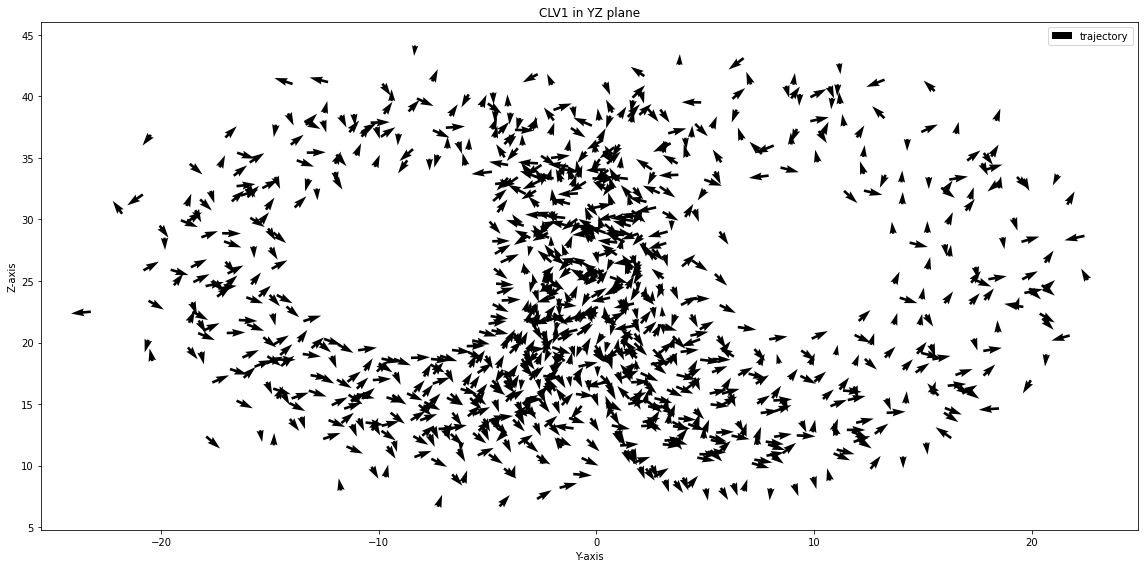

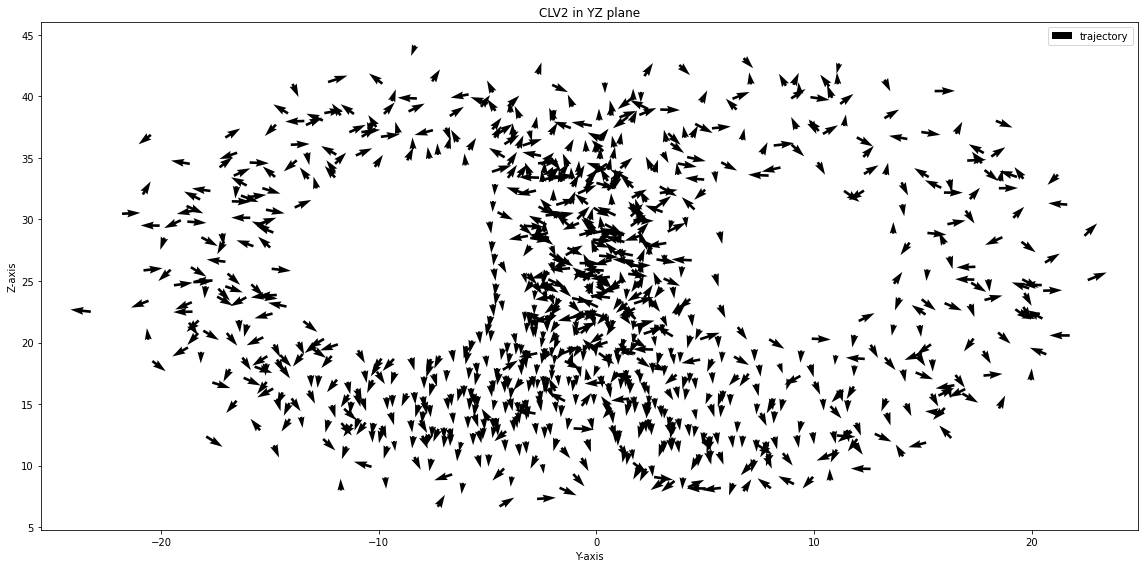

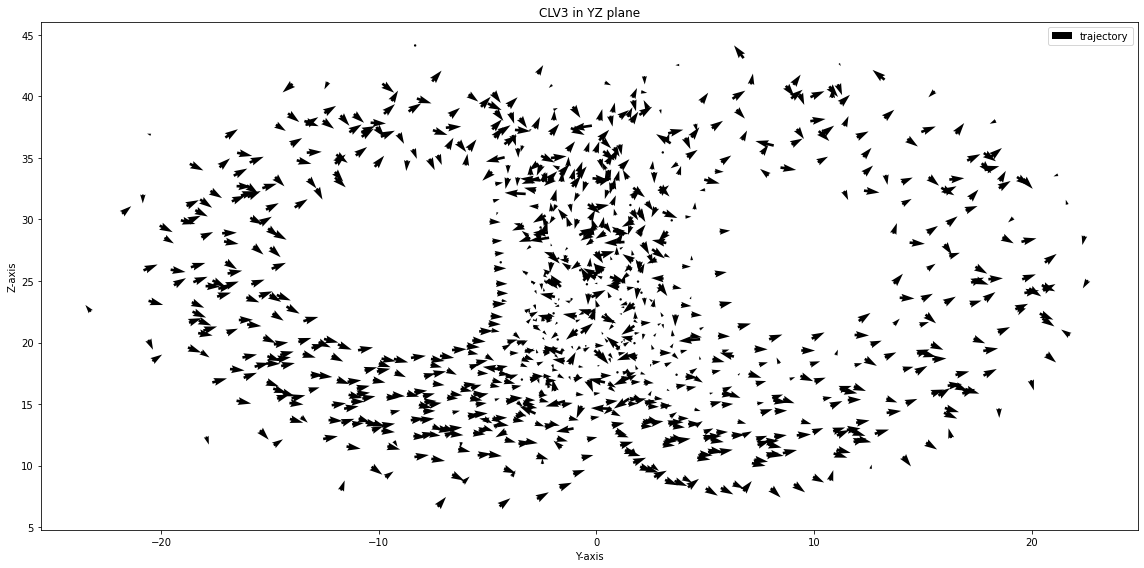

In [12]:
clv_index=0
plot_pairs=[[1,2]]
for clv_index in range(num_clv):
    for l,m in plot_pairs:
        fig, ax = plt.subplots(figsize=(16,8))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],V[::spr,l,clv_index],V[::spr,m,clv_index],scale_units='xy',scale=1.0,color='black',label='trajectory')
        #ax.quiver(traj2[::spr,l],traj2[::spr,m],V2[::spr,clv_index,l],V2[::spr,clv_index,m],scale_units='xy',scale=1.0,color='blue',label='trajectory 2')
        #ax.scatter(traj2[0,l],traj2[0,m],c='orange',s=80,edgecolors='blue')
        #ax.plot(base_traj[::spr,l],base_traj[::spr,m])
        #ax.scatter(traj[0,l],traj[0,m],c='r',s=80,edgecolors='black')
        ax.set_title('CLV{} in {}{} plane'.format(clv_index+1,coord[l],coord[m]))
        ax.set_xlabel('{}-axis'.format(coord[l]))
        ax.set_ylabel('{}-axis'.format(coord[m]))
        plt.legend()
        plt.tight_layout()